<center>

### TRƯỜNG ĐẠI HỌC SƯ PHẠM KỸ THUẬT TP.HỒ CHÍ MINH
### KHOA CÔNG NGHỆ THÔNG TIN

<img src="https://avatars.githubusercontent.com/u/75773455?s=280&v=4" alt="Logo" width="300" height="300">

## BÁO CÁO CUỐI KÌ
### MÔN HỌC : LẬP TRÌNH PYTHON
### ĐỀ TÀI: XÂY DỰNG MÔ HÌNH DỰ ĐOÁN KHẢ NĂNG MẮC BỆNH TIM
### GVHD: ThS. Trần Trọng Bình

</center>


### Sinh viên thực hiện – Nhóm 20:


<center>

### **01**
### **Tóm tắt**

</center>

- ***BÀI TOÁN DỰ ĐOÁN KHẢ NĂNG MẮC BỆNH TIM*** là một bài toán thuộc lĩnh vực học máy, trong đó mục tiêu là xây dựng một mô hình có thể dự đoán khả năng mắc bệnh tim thông qua các dữ kiện khảo sát như Age, Sex, Cholesterol,...
- Nhóm sử dụng ***Thuật toán k-Nearest Neighbors (kNN)*** để tính toán xem bệnh nhân đó có nguy cơ bị đau tim hay không.KNN hoạt động theo nguyên tắc "nearest neighbors". Khi có dữ liệu điểm và nhãn tương ứng, kNN sẽ lưu trữ những dữ liệu này trong bộ nhớ. Để dự đoán nhãn của các điểm dữ liệu mới, kNN sẽ dựa trên các điểm dữ liệu "nearest neighbors" với điểm dữ liệu đó.

<center>

### **02**
### **Phương pháp**

</center>

Thuật toán kNN:

+ Bước 1: Đọc dữ liệu từ tệp CSV để đưa vào DataFrame của pandas.
+ Bước 2: Phân chia dữ liệu thành các biến đầu vào (features) và biến mục tiêu (target).
+ Bước 3: Chia dữ liệu thành hai tập: tập huấn luyện (training set) và tập kiểm tra (testing set).
+ Bước 4: Tìm giá trị tốt nhất của tham số n_neighbors cho mô hình KNN.
+ Bước 5: Huấn luyện mô hình với giá trị n_neighbors tốt nhất


- Để xây dựng mô hình kNN, chúng ta cần xác định giá trị của tham số k. Tham số k là số lượng hàng xóm được sử dụng để tính toán sự tương quan giữa các điểm dữ liệu.

- Để tìm ra giá trị k phù hợp, có thể thực hiện các bước sau:
    - Bước 1: Xác định phạm vi các giá trị của n_neighbors mà chúng ta muốn kiểm tra.
    - Bước 2: Tạo một đối tượng KNeighborsClassifier để sử dụng trong quá trình tìm kiếm.
    - Bước 3: Thiết lập đối tượng GridSearchCV để tìm kiếm tham số tốt nhất cho mô hình KNN.
    - Bước 4: Thực hiện quá trình tìm kiếm để xác định giá trị tốt nhất của n_neighbors.
	- Bước 5: Lấy ra giá trị tốt nhất của n_neighbors và độ chính xác tương ứng.

<center>

### **03**
### **Dữ liệu**

</center>

#### **Tổng quan về dataset**

\- Tập dữ liệu sử dụng trong bài toán này là [Heart Attack Risk](https://drive.google.com/uc?export=download&id=1CXbWYU8NAaYPSstVAwQEJ1KnPFRIhFRR), được cung cấp bởi Kaggle. 
\- Tập dữ liệu chứa thông tin, các tác nhân liên quan đến bệnh tim của 8.763 người. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
file_path = 'https://drive.google.com/uc?export=download&id=1CXbWYU8NAaYPSstVAwQEJ1KnPFRIhFRR'

data = pd.read_csv(file_path, encoding='latin-1')
data.head(5)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


#### Thống kê những người mắc bệnh tim theo độ tuổi

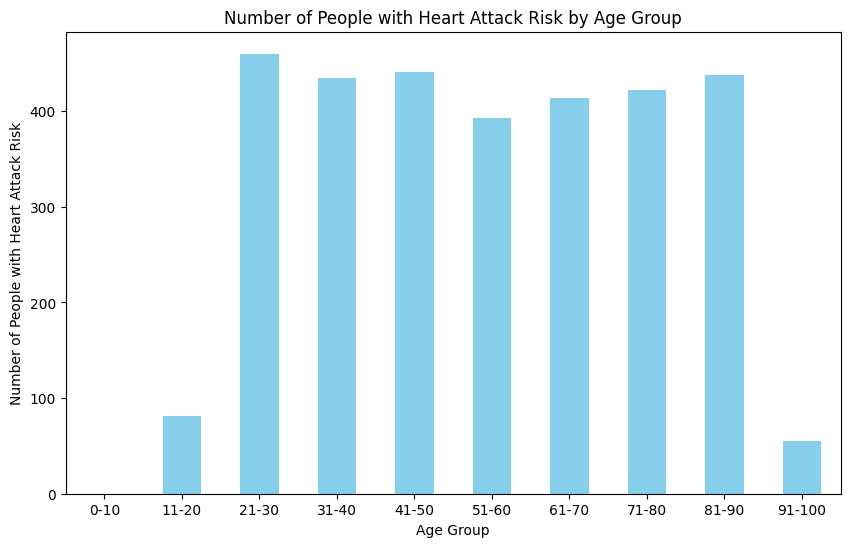

In [3]:
# Giả sử 'data' là DataFrame đã được định nghĩa từ trước và chứa các cột 'Heart Attack Risk' và 'Age'

# Lọc dữ liệu cho những người có nguy cơ mắc bệnh tim
users_with_risk = data[data['Heart Attack Risk'] == 1].copy()

# Định nghĩa các nhóm tuổi
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Phân loại tuổi vào các nhóm
users_with_risk.loc[:, 'Age Group'] = pd.cut(users_with_risk['Age'], bins=bins, labels=labels, right=False)

# Đếm số lượng người trong mỗi nhóm tuổi
age_group_counts = users_with_risk['Age Group'].value_counts().sort_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Number of People with Heart Attack Risk')
plt.title('Number of People with Heart Attack Risk by Age Group')
plt.xticks(rotation=0)
plt.show()


#### Thống kê những người có nguy cơ mắc bệnh tim

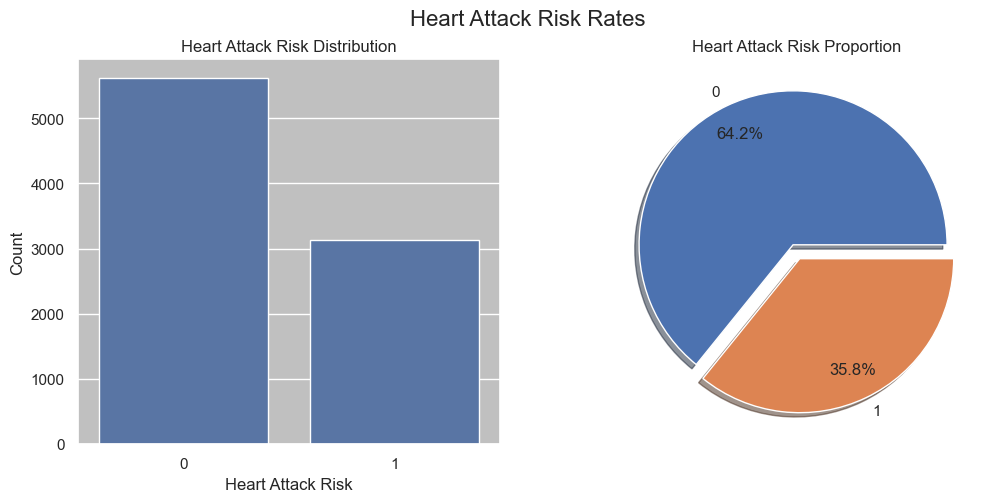

In [4]:
# Set the figure size
plt.figure(figsize=(12, 5))

# Set the style and color of the plots
sns.set(rc={'axes.facecolor': 'c0c0c0', 'figure.facecolor': 'lightblue'})

# Create a bar plot for Heart Attack Risk
plt.subplot(1, 2, 1)
sns.barplot(x=data['Heart Attack Risk'].value_counts().index, y=data['Heart Attack Risk'].value_counts())
plt.title("Heart Attack Risk Distribution")
plt.xlabel("Heart Attack Risk")
plt.ylabel("Count")

# Create a pie chart for Heart Attack Risk
plt.subplot(1, 2, 2)
plt.pie(x=data["Heart Attack Risk"].value_counts(), autopct="%.1f%%", pctdistance=0.8,
        labels=data["Heart Attack Risk"].value_counts().index, shadow=True, explode=[0.05] * len(data["Heart Attack Risk"].value_counts()))
plt.title("Heart Attack Risk Proportion")

# Add a super title for the figure
plt.suptitle("Heart Attack Risk Rates", fontsize=16)

# Display the plots
plt.show()

#### Vẽ biểu đồ cột so sánh số lượng bệnh nhân mắc bệnh tim giữa nhóm người hút thuốc lá và nhóm người không hút thuốc lá

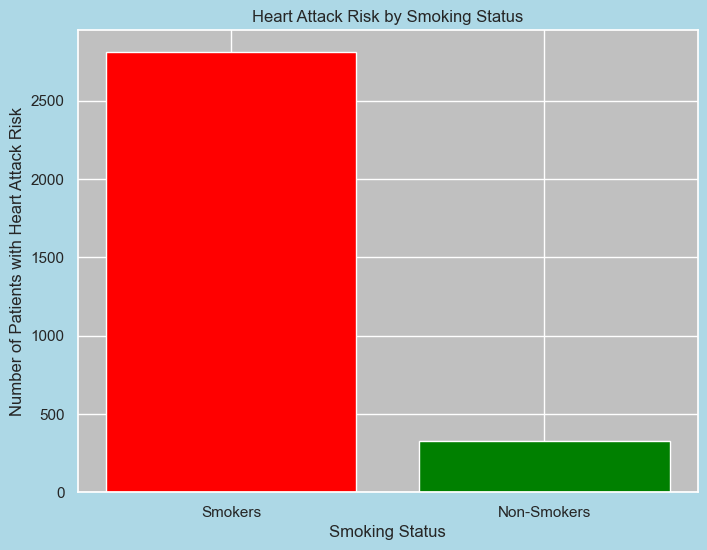

In [5]:
# Lọc dữ liệu cho những người có nguy cơ mắc bệnh tim
risk_patients = data[data['Heart Attack Risk'] == 1]

# Tạo DataFrame cho nhóm người hút thuốc lá và nhóm người không hút thuốc lá
smokers = risk_patients[risk_patients['Smoking'] == 1]
non_smokers = risk_patients[risk_patients['Smoking'] == 0]

# Lấy số lượng người mắc bệnh tim trong mỗi nhóm
smokers_count = smokers.shape[0]
non_smokers_count = non_smokers.shape[0]

# Tạo biểu đồ
plt.figure(figsize=(8, 6))
plt.bar(['Smokers', 'Non-Smokers'], [smokers_count, non_smokers_count], color=['red', 'green'])
plt.title('Heart Attack Risk by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Number of Patients with Heart Attack Risk')
plt.show()

Trực quan hóa dữ liệu phân loại: Đoạn mã này giúp bạn hiểu rõ hơn về phân bố của các giá trị trong mỗi đặc điểm phân loại. Biểu đồ thanh và biểu đồ tròn cung cấp cái nhìn trực quan về tần suất xuất hiện của các giá trị, giúp phát hiện các mẫu hoặc bất thường trong dữ liệu.

Phân tích dữ liệu: Trực quan hóa này có thể giúp bạn trong việc phân tích và chuẩn bị dữ liệu cho các mô hình học máy, kiểm tra sự cân bằng của dữ liệu, và hiểu rõ hơn về mối quan hệ giữa các đặc điểm phân loại.

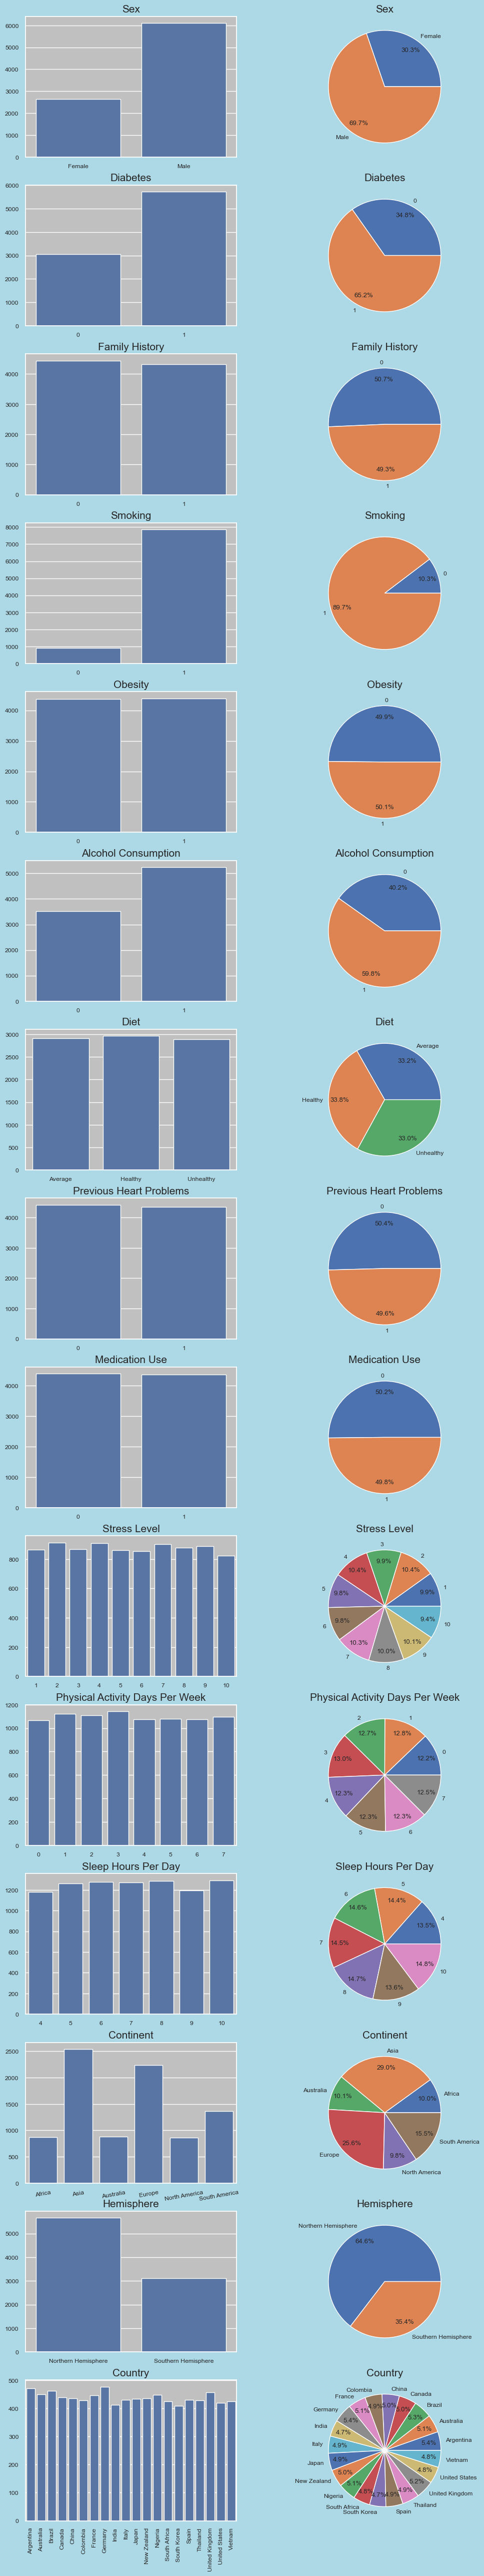

In [6]:
cat_fea_list = ['Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Diet',
        'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Physical Activity Days Per Week',
        'Sleep Hours Per Day', 'Continent', 'Hemisphere', 'Country']
plt.figure(figsize=(12,65))
sns.set(rc={'axes.facecolor':'c0c0c0', 'figure.facecolor':'lightblue'}, font_scale=0.8)

i = 0
j = 0
for col in cat_fea_list:
    feature = data.groupby(col)[col].count()
    plt.subplot(15, 2, i+1)
    sns.barplot(x=feature.index, y=feature.values)
    plt.title(col, fontsize=15)
    plt.xlabel("")
    #plt.xlabel(col, fontsize=12, color="#8b1a1a")
    if col == "Country":
        plt.xticks(rotation=90)
    if col == "Continent":
        plt.xticks(rotation=10)
        
    plt.subplot(15, 2, j+2)
    plt.pie(x=feature.values, autopct="%.1f%%", pctdistance=0.8, labels=feature.index)
    plt.title(col, fontsize=15)
    #plt.xlabel(col, fontsize=12, color="#8b1a1a")
    i += 2
    j += 2
plt.show()

#### Nguy cơ mắc bệnh tim theo huyết áp

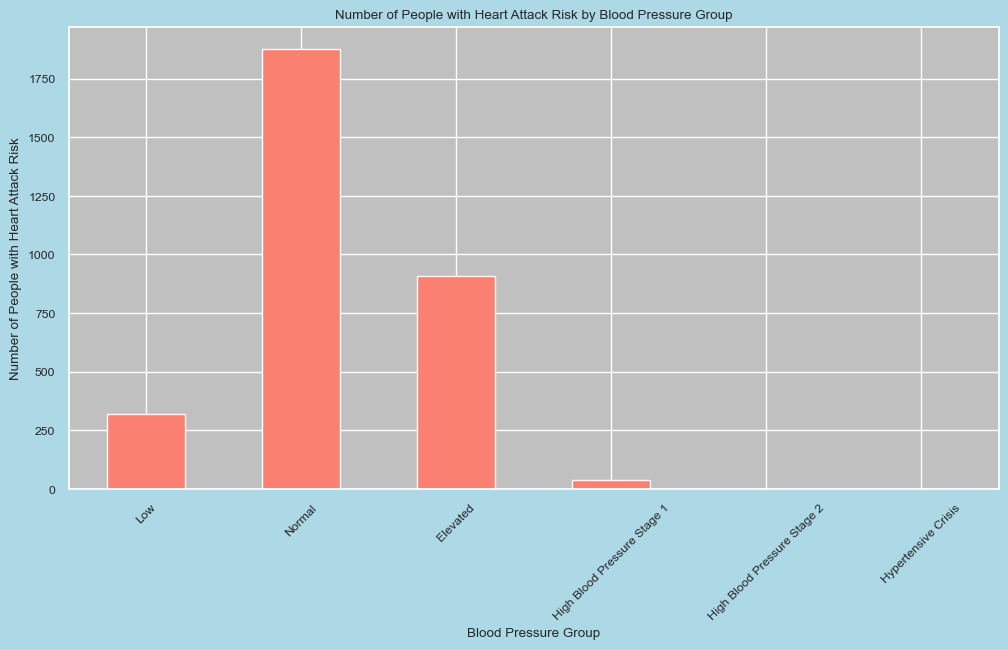

In [7]:
# Chuyển đổi cột 'Blood Pressure' từ dạng chuỗi sang hai cột riêng biệt cho huyết áp tâm thu và tâm trương
data[['Systolic', 'Diastolic']] = data['Blood Pressure'].str.split('/', expand=True)

# Chuyển đổi cột mới từ chuỗi sang số nguyên
data['Systolic'] = pd.to_numeric(data['Systolic'], errors='coerce')
data['Diastolic'] = pd.to_numeric(data['Diastolic'], errors='coerce')

# Lọc những người có nguy cơ mắc bệnh tim
users_with_risk = data[data['Heart Attack Risk'] == 1].copy()  # Tạo bản sao của dữ liệu

# Định nghĩa các nhóm huyết áp dựa trên cả tâm thu và tâm trương
bins = [0, 90, 120, 140, 160, 180, 200]  # Sử dụng 8 biên
labels = ['Low', 'Normal', 'Elevated', 'High Blood Pressure Stage 1', 'High Blood Pressure Stage 2', 'Hypertensive Crisis']

# Tính toán huyết áp trung bình của mỗi người
users_with_risk['Average Blood Pressure'] = (users_with_risk['Systolic'] + users_with_risk['Diastolic']) / 2

# Phân loại huyết áp vào các nhóm
users_with_risk['Blood Pressure Group'] = pd.cut(users_with_risk['Average Blood Pressure'], bins=bins, labels=labels, right=False)

# Đếm số lượng người trong mỗi nhóm huyết áp
bp_risk_counts = users_with_risk['Blood Pressure Group'].value_counts().sort_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
bp_risk_counts.plot(kind='bar', color='salmon')
plt.xlabel('Blood Pressure Group')
plt.ylabel('Number of People with Heart Attack Risk')
plt.title('Number of People with Heart Attack Risk by Blood Pressure Group')
plt.xticks(rotation=45)
plt.show()

#### Nguy cơ mắc bệnh tim theo số giờ ngủ mỗi ngày

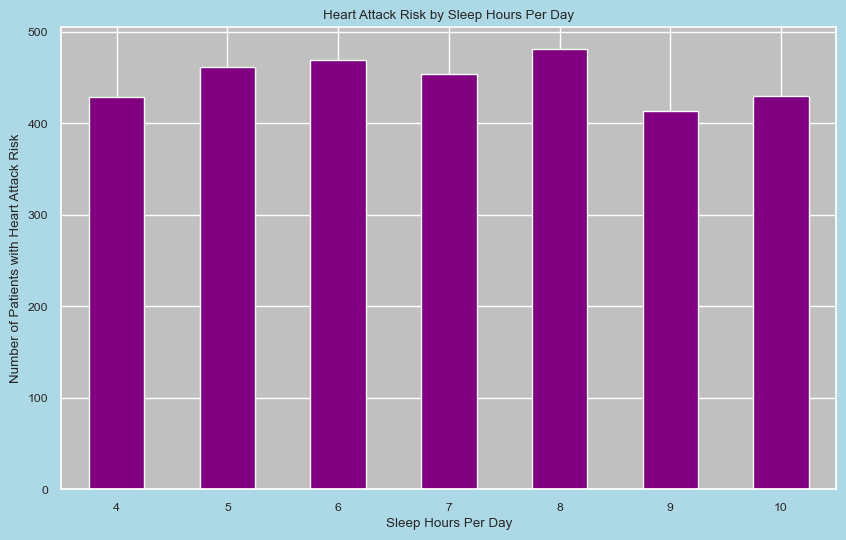

In [8]:
# Lọc dữ liệu cho những người có nguy cơ mắc bệnh tim
risk_patients = data[data['Heart Attack Risk'] == 1]

# Đếm số lượng người mắc bệnh tim theo số giờ ngủ mỗi ngày
sleep_hours_counts = risk_patients['Sleep Hours Per Day'].value_counts().sort_index()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sleep_hours_counts.plot(kind='bar', color='purple')
plt.title('Heart Attack Risk by Sleep Hours Per Day')
plt.xlabel('Sleep Hours Per Day')
plt.ylabel('Number of Patients with Heart Attack Risk')
plt.xticks(rotation=0)
plt.show()

#### Vẽ biểu đồ cột thể hiện số lượng bệnh nhân mắc bệnh tim dựa trên số ngày hoạt động vận động mỗi tuần.

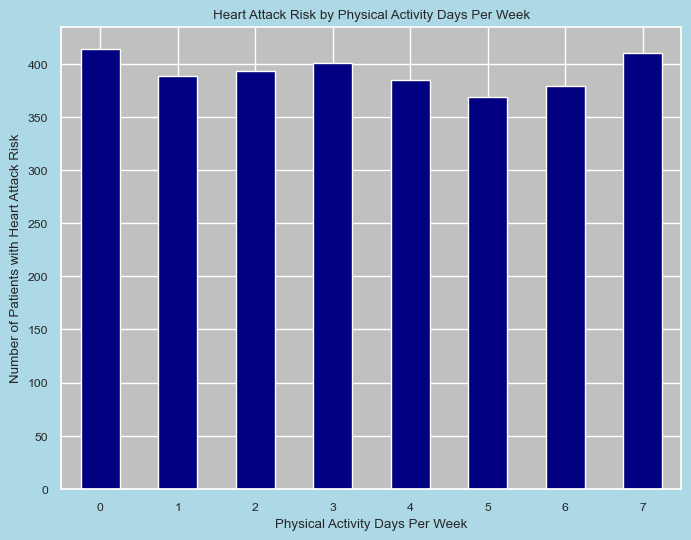

In [9]:
# Lọc dữ liệu cho những người có nguy cơ mắc bệnh tim
risk_patients = data[data['Heart Attack Risk'] == 1]

# Đếm số lượng người mắc bệnh tim theo số ngày hoạt động vận động mỗi tuần
physical_activity_counts = risk_patients['Physical Activity Days Per Week'].value_counts().sort_index()

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
physical_activity_counts.plot(kind='bar', color='navy')
plt.title('Heart Attack Risk by Physical Activity Days Per Week')
plt.xlabel('Physical Activity Days Per Week')
plt.ylabel('Number of Patients with Heart Attack Risk')
plt.xticks(rotation=0)
plt.show()


#### Người mắc bệnh tim theo nhóm số giờ tập thể dục mỗi tuần

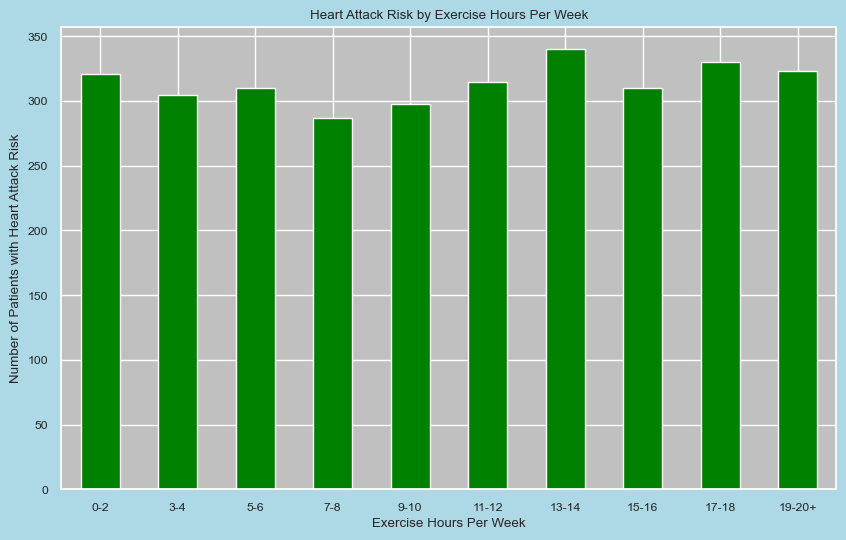

In [10]:
# Lọc dữ liệu cho những người có nguy cơ mắc bệnh tim
risk_patients = data[data['Heart Attack Risk'] == 1].copy()

# Xử lý các giá trị thiếu hoặc không hợp lệ trong cột 'Exercise Hours Per Week'
risk_patients = risk_patients.dropna(subset=['Exercise Hours Per Week'])
risk_patients = risk_patients[risk_patients['Exercise Hours Per Week'].apply(lambda x: isinstance(x, (int, float)))]

# Gộp số giờ tập thể dục mỗi tuần thành các nhóm
exercise_bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
exercise_labels = ['0-2', '3-4', '5-6', '7-8', '9-10', '11-12', '13-14', '15-16', '17-18', '19-20+']
risk_patients.loc[:, 'Exercise Group'] = pd.cut(risk_patients['Exercise Hours Per Week'], bins=exercise_bins, labels=exercise_labels, right=False, include_lowest=True)

# Đếm số lượng người mắc bệnh tim theo nhóm số giờ tập thể dục mỗi tuần
exercise_hours_counts = risk_patients['Exercise Group'].value_counts().sort_index()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
exercise_hours_counts.plot(kind='bar', color='green')
plt.title('Heart Attack Risk by Exercise Hours Per Week')
plt.xlabel('Exercise Hours Per Week')
plt.ylabel('Number of Patients with Heart Attack Risk')
plt.xticks(rotation=0)
plt.show()

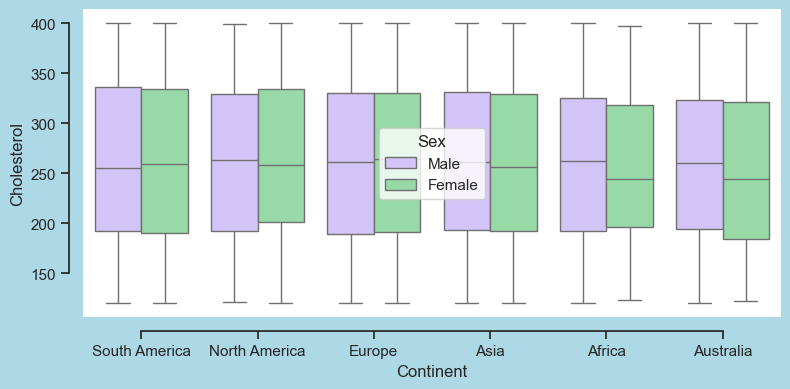

In [11]:
# Set up the plot
plt.figure(figsize=(9, 4))
sns.set_theme(style="ticks", palette="pastel")

# Create the boxplot
sns.boxplot(x="Continent", y='Cholesterol', hue="Sex", palette=["m", "g"], data=data)

# Remove the top and right spines from plot
sns.despine(offset=10, trim=True)

# Display the plot
plt.show()

#### Biểu đồ hộp

Mục đích

Phân tích phân bố dữ liệu: Biểu đồ hộp giúp hiển thị phân bố của các biến số, bao gồm trung vị (median), các phần tư (quartiles) và các giá trị ngoại lệ (outliers).

Phát hiện giá trị ngoại lệ: Biểu đồ hộp làm nổi bật các giá trị ngoại lệ, giúp bạn nhận biết và quyết định cách xử lý chúng trong phân tích dữ liệu.

So sánh các biến số: Khi đặt các biểu đồ hộp cạnh nhau, bạn có thể dễ dàng so sánh sự phân bố của nhiều biến số khác nhau.

Trực quan hóa dữ liệu: Trực quan hóa các biến số bằng biểu đồ hộp giúp bạn hiểu rõ hơn về dữ liệu và dễ dàng phát hiện các đặc điểm đặc biệt hoặc bất thường trong dữ liệu.

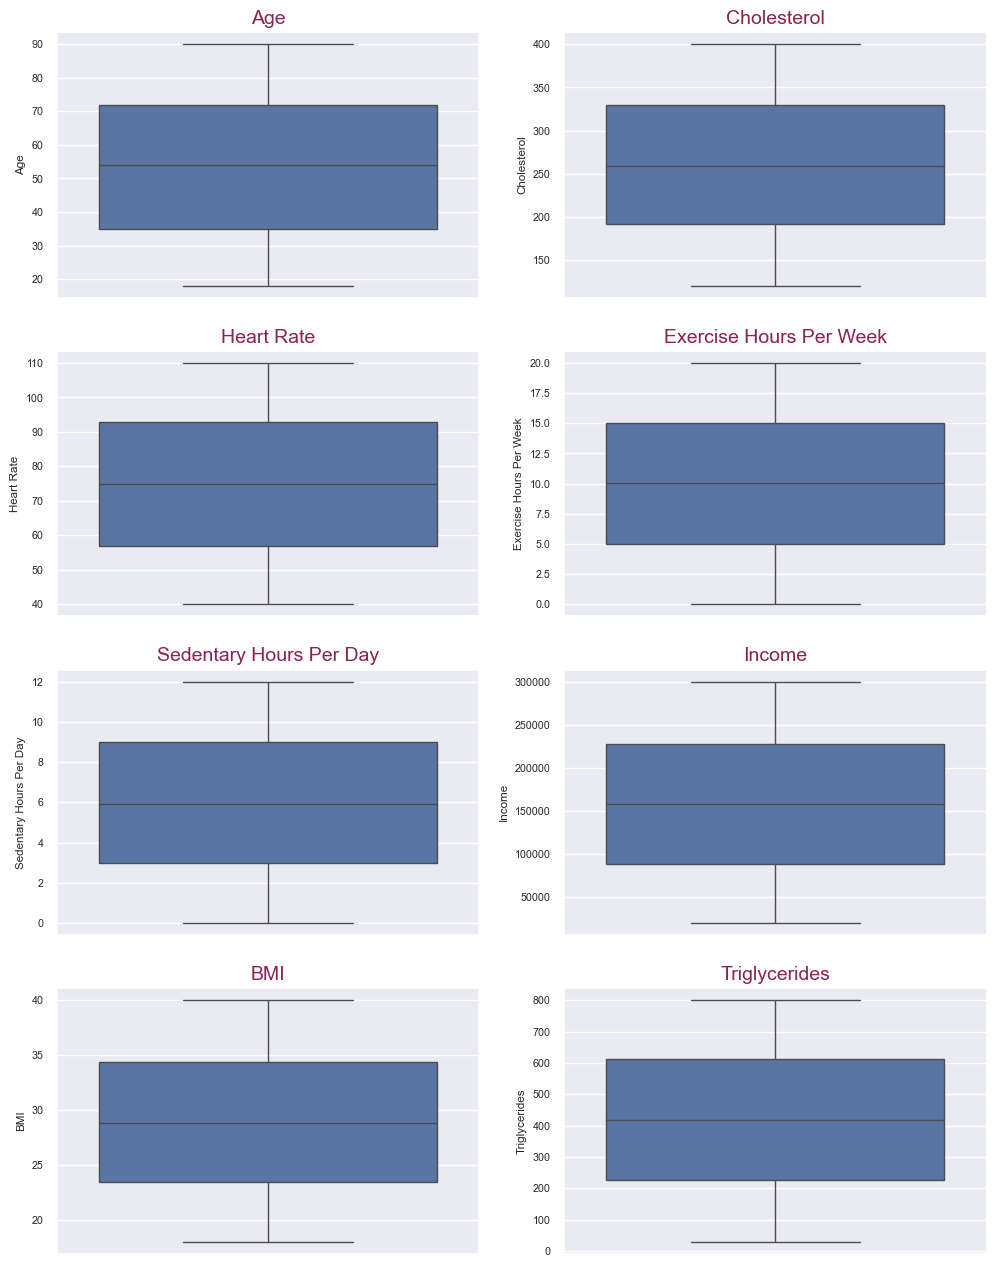

In [12]:
num_fea_list = ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Sedentary Hours Per Day',
                'Income', 'BMI', 'Triglycerides']
plt.figure(figsize=(12,20))
sns.set(rc={'figure.facecolor':'lightblue'}, font_scale=0.7)

for i, col in enumerate(num_fea_list):
    plt.subplot(5, 2, i+1)
    sns.boxplot(data[col])
    plt.title(col, fontsize=14, color="#8b2252")
    plt.xlabel("\n")
plt.show()

#### HeatMap: Mối quan hệ của các biến với nguy cơ đau tim

<Axes: >

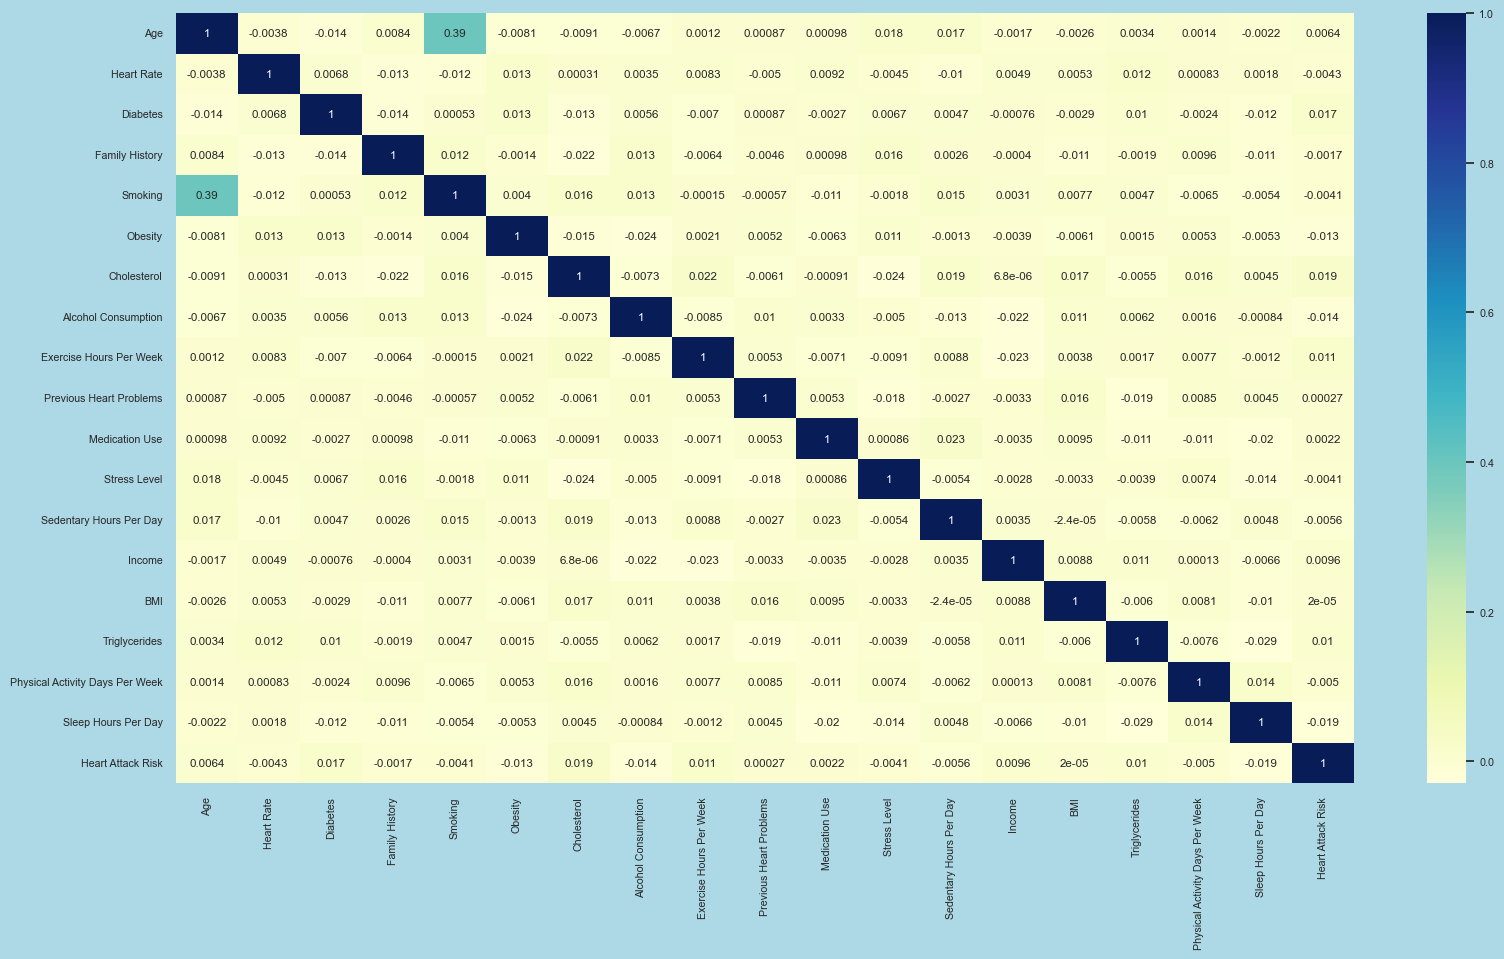

In [13]:
plt.figure(figsize = (19,10))
sns.heatmap(data[['Age','Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
      'Cholesterol','Alcohol Consumption', 'Exercise Hours Per Week',
     'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day','Heart Attack Risk']].corr(), cmap="YlGnBu",
            annot=True)

#### **Những phát hiện chính:**

1.Tương quan dương cao nhất:

- Diabetes (Bệnh tiểu đường) (0,017): Tiểu đường tăng thì nguy cơ đau tim tăng.

- Cholestrol (0,019): Lượng cholestrol tăng sẽ tăng nguy cơ đau tim.

- Exercise Hours Per Week (Số giờ tập thể dục mỗi tuần) (0,011): Tập thể dục điều độ sẽ không ảnh hưởng tới nguy cơ đau tim. Tuy nhiên, số giờ tập thể dục quá cao thì sẽ tăng nguy cơ đau tim.

2.Tương quan âm cao nhất:

- Alcohol Consumption (Tiêu thụ rượu) (-0,014): Uống rượu ở mức độ vừa phải có thể giảm nguy cơ đau tim và các bệnh tim mạch khác. Tuy nhiên, điều này không có nghĩa là uống nhiều rượu sẽ tốt cho sức khỏe tim mạch.

- Sleep Hours Per Day (Số giờ ngủ mỗi ngày) (-0,019): Số giờ ngủ càng ít thì nguy cơ thì nguy cơ đau tim càng tăng.

3.Không có mối tương quan tuyến tính:

- Sedentary Hours Per Day (Số giờ ít vận động trong ngày) (-0,0056): Nguy cơ đau tim không phụ thuộc nhiều vào số giờ ít vận động trong mỗi ngày.

- Smoking (Hút thuốc) (-0,0041): Người trưởng thành thì có xu hướng hút thuốc cao là (0,39), tuy nhiên hút thuốc không phải là nguyên nhân chính gây đau tim.

- Loại bỏ các trường không dùng đến
- Xây dựng và đánh giá mô hình KNN để dự đoán nguy cơ mắc bệnh tim, và cung cấp một hàm để dự đoán nguy cơ dựa trên các thông tin đặc trưng của người dùng.

In [14]:
# Đọc dữ liệu từ file CSV
file_path = 'heart_attack_prediction_dataset.csv'
data = pd.read_csv(file_path)
# Bước 1: Loại bỏ danh sách các cột không cần thiết
# Loại các cột không phân tích được
columns_to_drop = ['Patient ID', 'Country', 'Continent', 'Hemisphere','Sex','Diet','Blood Pressure']

data = data.drop(columns=columns_to_drop)
# Loại bỏ các cột không có mối tương quan tuyến tính
columns_to_drop = ['Sedentary Hours Per Day', 'Alcohol Consumption']

data = data.drop(columns=columns_to_drop)


In [15]:
# Bước 2: Xử lý và chuẩn bị dữ liệu
X = data.iloc[:, :-1].values  # Tất cả các cột trừ cột cuối
y = data.iloc[:, -1].values   # Cột cuối cùng

# Bước 3: Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bước 4: Sử dụng Grid Search để tìm giá trị n_neighbors tốt nhất
param_grid = {'n_neighbors': list(range(1, 101))}  # Thử nghiệm với k từ 1 đến 20
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Kết quả Grid Search
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f'Best n_neighbors: {best_k}')
print(f'Best cross-validated accuracy: {best_score * 100:.2f}%')

# Bước 5: Huấn luyện mô hình với giá trị n_neighbors tốt nhất
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = knn_best.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy * 100:.2f}%')

# Báo cáo phân loại
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Ma trận nhầm lẫn
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Best n_neighbors: 93
Best cross-validated accuracy: 64.25%
Test accuracy: 64.18%
Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753

Confusion Matrix:
[[1125    0]
 [ 628    0]]


C:\Users\Duy\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Duy\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Duy\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le